# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set up list for each column in dataframe
City_name=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lng=[]
Lat=[]
Max_Temp = []
Wind_speed=[]


# Loop through the list of cities and perform a request for data on each
for city in cities:
    #set base URL
    url = "http://api.openweathermap.org/data/2.5/weather?"
    #set temp unit
    units = "metric"
    # Build query URL and request your results in Celsius
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_json = requests.get(query_url).json()
    try:
        City_name.append(weather_json["name"])
        Cloudiness.append(weather_json["clouds"]["all"])
        Country.append(weather_json["sys"]["country"])
        Date.append(weather_json["dt"])
        Humidity.append(weather_json["main"]["humidity"])
        Lng.append(weather_json["coord"]["lon"])
        Lat.append(weather_json["coord"]["lat"])
        Max_Temp.append(weather_json["main"]["temp_max"])
        Wind_speed.append(weather_json["wind"]["speed"])
        print(f"{city} is found")
    except:
        print("Oops, this city is not found")
    


busselton is found
cape town is found
punta arenas is found
batagay-alyta is found
atar is found
roald is found
vaini is found
hilo is found
jamestown is found
hithadhoo is found
caucaia is found
hobart is found
kieta is found
jingdezhen is found
kaoma is found
hermanus is found
Oops, this city is not found
port lincoln is found
Oops, this city is not found
saint-philippe is found
japura is found
tuktoyaktuk is found
kaitangata is found
torbay is found
rocha is found
port elizabeth is found
belmonte is found
avarua is found
gawler is found
Oops, this city is not found
kodiak is found
carnarvon is found
iquique is found
bud is found
mehamn is found
amazar is found
upernavik is found
Oops, this city is not found
klaksvik is found
saldanha is found
yatou is found
mayor pablo lagerenza is found
staryy nadym is found
bluff is found
atuona is found
ilulissat is found
fortuna is found
comodoro rivadavia is found
dikson is found
qaanaaq is found
Oops, this city is not found
dakoro is found
ric

luwingu is found
boa vista is found
sobolevo is found
tazovskiy is found
chapais is found
caarapo is found
coahuayana is found
san javier is found
Oops, this city is not found
kyren is found
peleduy is found
chulumani is found
Oops, this city is not found
krasnouralsk is found
fort-shevchenko is found
muisne is found
mabaruma is found
hobyo is found
manzhouli is found
Oops, this city is not found
kurikka is found
wadi musa is found
asbe teferi is found
toribio is found
sept-iles is found
pringsewu is found
houston is found
ponta delgada is found
wick is found
kisangani is found
areosa is found
callaway is found
eldorado is found
zyryanka is found
tynda is found
kendari is found
Oops, this city is not found
Oops, this city is not found
dajal is found
entebbe is found
kuminskiy is found
Oops, this city is not found
bage is found
lompoc is found
talnakh is found
Oops, this city is not found
peniche is found
sechura is found
Oops, this city is not found
antalaha is found
owando is found
to

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "City_name": City_name,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lng": Lng,
    "Lat": Lat,
    "Max_Temp": Max_Temp,
    "Wind_speed": Wind_speed 
}
weather_data = pd.DataFrame(weather_dict)

# Export file as a CSV, without the Pandas index, but with the header
weather_data.to_csv("../Output/weather_data.csv", index=False, header=True)
weather_data.head()

,City_name,Cloudiness,Country,Date,Humidity,Lng,Lat,Max_Temp,Wind_speed
0,Busselton,0,AU,1544197675,100,115.35,-33.64,15.82,6.18
1,Cape Town,75,ZA,1544194800,52,18.42,-33.93,20.00,6.70
2,Punta Arenas,40,CL,1544194800,50,-70.91,-53.16,15.00,12.30
3,Batagay-Alyta,0,RU,1544197676,0,130.41,67.80,-40.91,1.08
4,Atar,0,MR,1544194800,9,-13.05,20.52,32.00,4.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

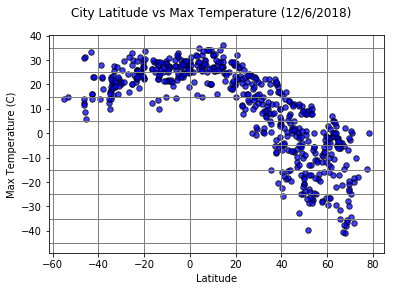

In [8]:
y=weather_data['Max_Temp']
#Plot chart
plt.scatter(weather_data['Lat'], y, s = 30, color = 'blue', edgecolor = 'black', alpha = .75)
# Add reference lines
for i in list(np.arange(-45, 45, 10)):
    plt.axhline(i,linewidth=1, color='grey')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='grey')
#Titles
plt.suptitle('City Latitude vs Max Temperature (12/6/2018)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig("../Images/lat_vs_temp.png")

* This plot shows it is winter time in northen hemisphere and summer time in southern hemisphere
* This plot also shows temperature could be very differnt even if two cities are on the same latitude, so temperature is not only affected by latitude but also other factors

#### Latitude vs. Humidity Plot

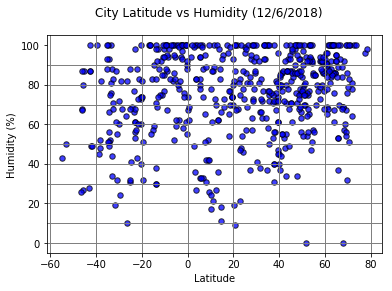

In [9]:
y=weather_data['Humidity']
#Plot chart
plt.scatter(weather_data['Lat'], y, s = 30, color = 'blue', edgecolor = 'black', alpha = .75)
# Add reference lines
for i in list(np.arange(0, 100, 10)):
    plt.axhline(i,linewidth=1, color='grey')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='grey')
#Titles
plt.suptitle('City Latitude vs Humidity (12/6/2018)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../Images/lat_vs_humid.png")

* Humidity data is evenly scattered globally, regardless of the latitude

#### Latitude vs. Cloudiness Plot

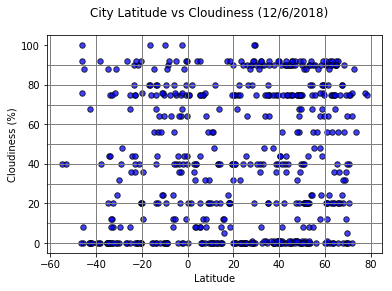

In [10]:
y=weather_data['Cloudiness']
#Plot chart
plt.scatter(weather_data['Lat'], y, s = 30, color = 'blue', edgecolor = 'black', alpha = .75)
# Add reference lines
for i in list(np.arange(0, 100, 10)):
    plt.axhline(i,linewidth=1, color='grey')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='grey')
#Titles
plt.suptitle('City Latitude vs Cloudiness (12/6/2018)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../Images/lat_vs_cloud.png")

* Cloudness data is evenly scattered globally, regardless of the latitude

#### Latitude vs. Wind Speed Plot

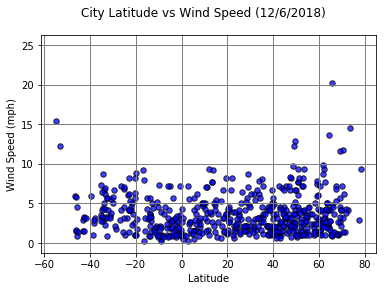

In [11]:
y=weather_data['Wind_speed']
#Plot chart
plt.scatter(weather_data['Lat'], y, s = 30, color = 'blue', edgecolor = 'black', alpha = .75)
# Add reference lines
for i in list(np.arange(0, 30, 5)):
    plt.axhline(i,linewidth=1, color='grey')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='grey')
#Titles
plt.suptitle('City Latitude vs Wind Speed (12/6/2018)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../Images/lat_vs_wind.png")

* Cities in the northen hemisphere has more extreme windspeed, but generally it's about the same distribution globally